In [1]:
import pandas as pd


In [4]:
df = pd.read_csv('gold prices.csv')

df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

In [5]:
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2023-08-17,1915.2,146770.0,1922.4,1933.5,1914.2
2023-08-16,1928.3,124766.0,1933.1,1938.2,1922.0
2023-08-15,1935.2,161512.0,1939.4,1944.3,1927.5
2023-08-14,1944.0,117514.0,1945.6,1948.2,1934.2
2023-08-11,1946.6,119090.0,1944.9,1953.6,1942.7


In [6]:
df.dropna(inplace=True)

In [7]:

df = df.iloc[::-1]
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2013-08-19,1365.7,116056.0,1377.1,1384.1,1362.0
2013-08-20,1372.6,130096.0,1364.9,1378.0,1351.6
2013-08-21,1370.1,137350.0,1371.0,1378.9,1359.2
2013-08-22,1370.8,134493.0,1365.6,1381.4,1354.5
2013-08-23,1395.8,149116.0,1376.1,1399.9,1367.8


<Axes: xlabel='Date'>

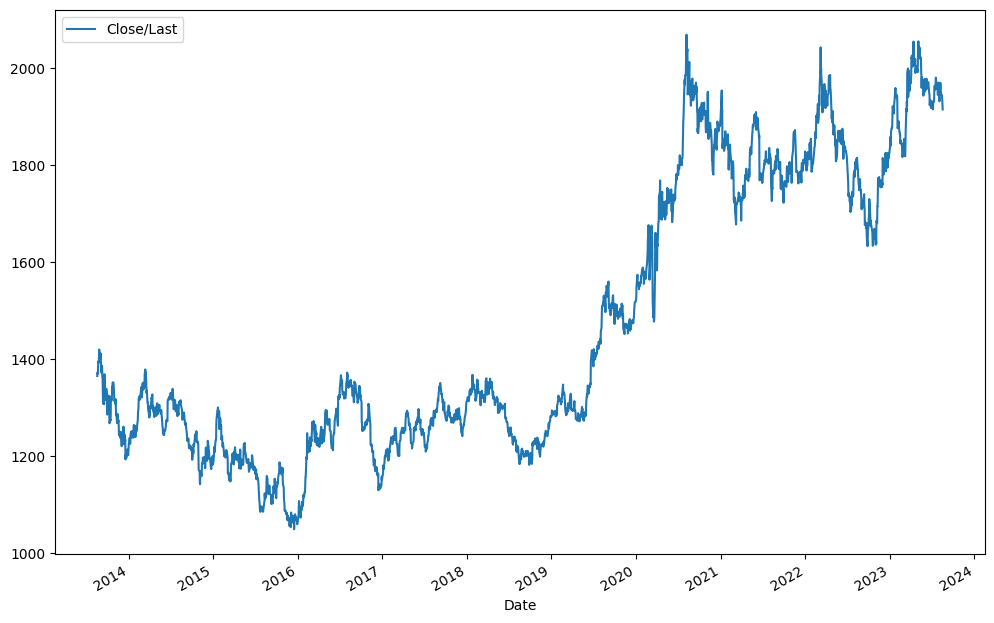

In [8]:
df["Close/Last"].plot(figsize=(12,8), legend=True)

In [10]:
df.tail()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2023-08-11,1946.6,119090.0,1944.9,1953.6,1942.7
2023-08-14,1944.0,117514.0,1945.6,1948.2,1934.2
2023-08-15,1935.2,161512.0,1939.4,1944.3,1927.5
2023-08-16,1928.3,124766.0,1933.1,1938.2,1922.0
2023-08-17,1915.2,146770.0,1922.4,1933.5,1914.2


In [11]:
import sklearn
from sklearn import svm, preprocessing

In [12]:
df = sklearn.utils.shuffle(df)

In [13]:
X = df.drop('Close/Last', axis=1).values
X = preprocessing.scale(X)
y = df['Close/Last'].values


In [14]:
test_size = 100
X_train = X[:-test_size]
y_train = y[:-test_size]

X_test = X[-test_size:]
y_test = y[-test_size:]

In [17]:
clf = svm.SVR(kernel='linear')
clf.fit(X_train, y_train)

SVR(kernel='linear')

In [18]:
clf.score(X_test, y_test)

0.9994914844294028

In [19]:
for X,y in zip(X_test, y_test):
    print(f"Model: {clf.predict([X])[0]}, Actual: {y}")

Model: 1282.2095677007742, Actual: 1285.2
Model: 1549.7190121237413, Actual: 1549.1
Model: 1785.824014839318, Actual: 1783.1
Model: 1178.5059110404984, Actual: 1173.4
Model: 1487.0040537312632, Actual: 1490.9
Model: 1225.609753628129, Actual: 1225.1
Model: 1286.0762028858708, Actual: 1283.4
Model: 1154.7267035478153, Actual: 1163.5
Model: 1737.7584545375475, Actual: 1753.3
Model: 1210.7421787741011, Actual: 1208.5
Model: 1293.360259362506, Actual: 1286.2
Model: 1919.6880680662987, Actual: 1922.2
Model: 1316.1850313657258, Actual: 1310.2
Model: 1308.4107171662001, Actual: 1305.6
Model: 1309.9653370344838, Actual: 1310.5
Model: 1207.9290951867408, Actual: 1207.7
Model: 1282.1376610544983, Actual: 1274.2
Model: 1863.6475144837323, Actual: 1870.6
Model: 1791.2280113630752, Actual: 1795.2
Model: 1253.7715277510824, Actual: 1256.4
Model: 1962.8610116241232, Actual: 1963.9
Model: 1177.063738249003, Actual: 1173.5
Model: 1282.037711817367, Actual: 1279.7
Model: 1626.9229079417823, Actual: 1633